# Experiment
Testing displacement estimation accuracy on edges vs on interiors of features in images.

### Goal:
Show experimentally that points on the interior of features provide a worse displacement vector estimation.

In [1]:
using LAP_julia, PyPlot

┌ Info: Precompiling LAP_julia [797d5b5c-2e9a-429f-9c9f-727808915e33]
└ @ Base loading.jl:1273


LAP_julia succesfully loaded!


## generate images and displacement

In [59]:
# params
one_dim_shift = 4
fhs = one_dim_shift*2
window = [2*fhs+1, 2*fhs+1];

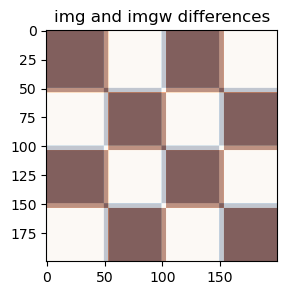

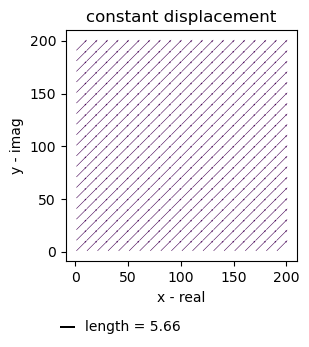

test


PyObject <matplotlib.quiver.Quiver object at 0x1963b26d0>

In [60]:
# get a constant shift and two images
img = gen_chess()
flow = one_dim_shift .* ones(size(img)) .+ one_dim_shift .* ones(size(img)) .* im
imgw = warp_img(img, -real(flow), -imag(flow))

# show image dif and shift
imgoverlay(img, imgw, fig=figure(figsize=(3,3)), figtitle="img and imgw differences", ret=:pyobject)
showflow(flow, fig=figure(figsize=(3,3)), figtitle="constant displacement", ret=:pyobject)

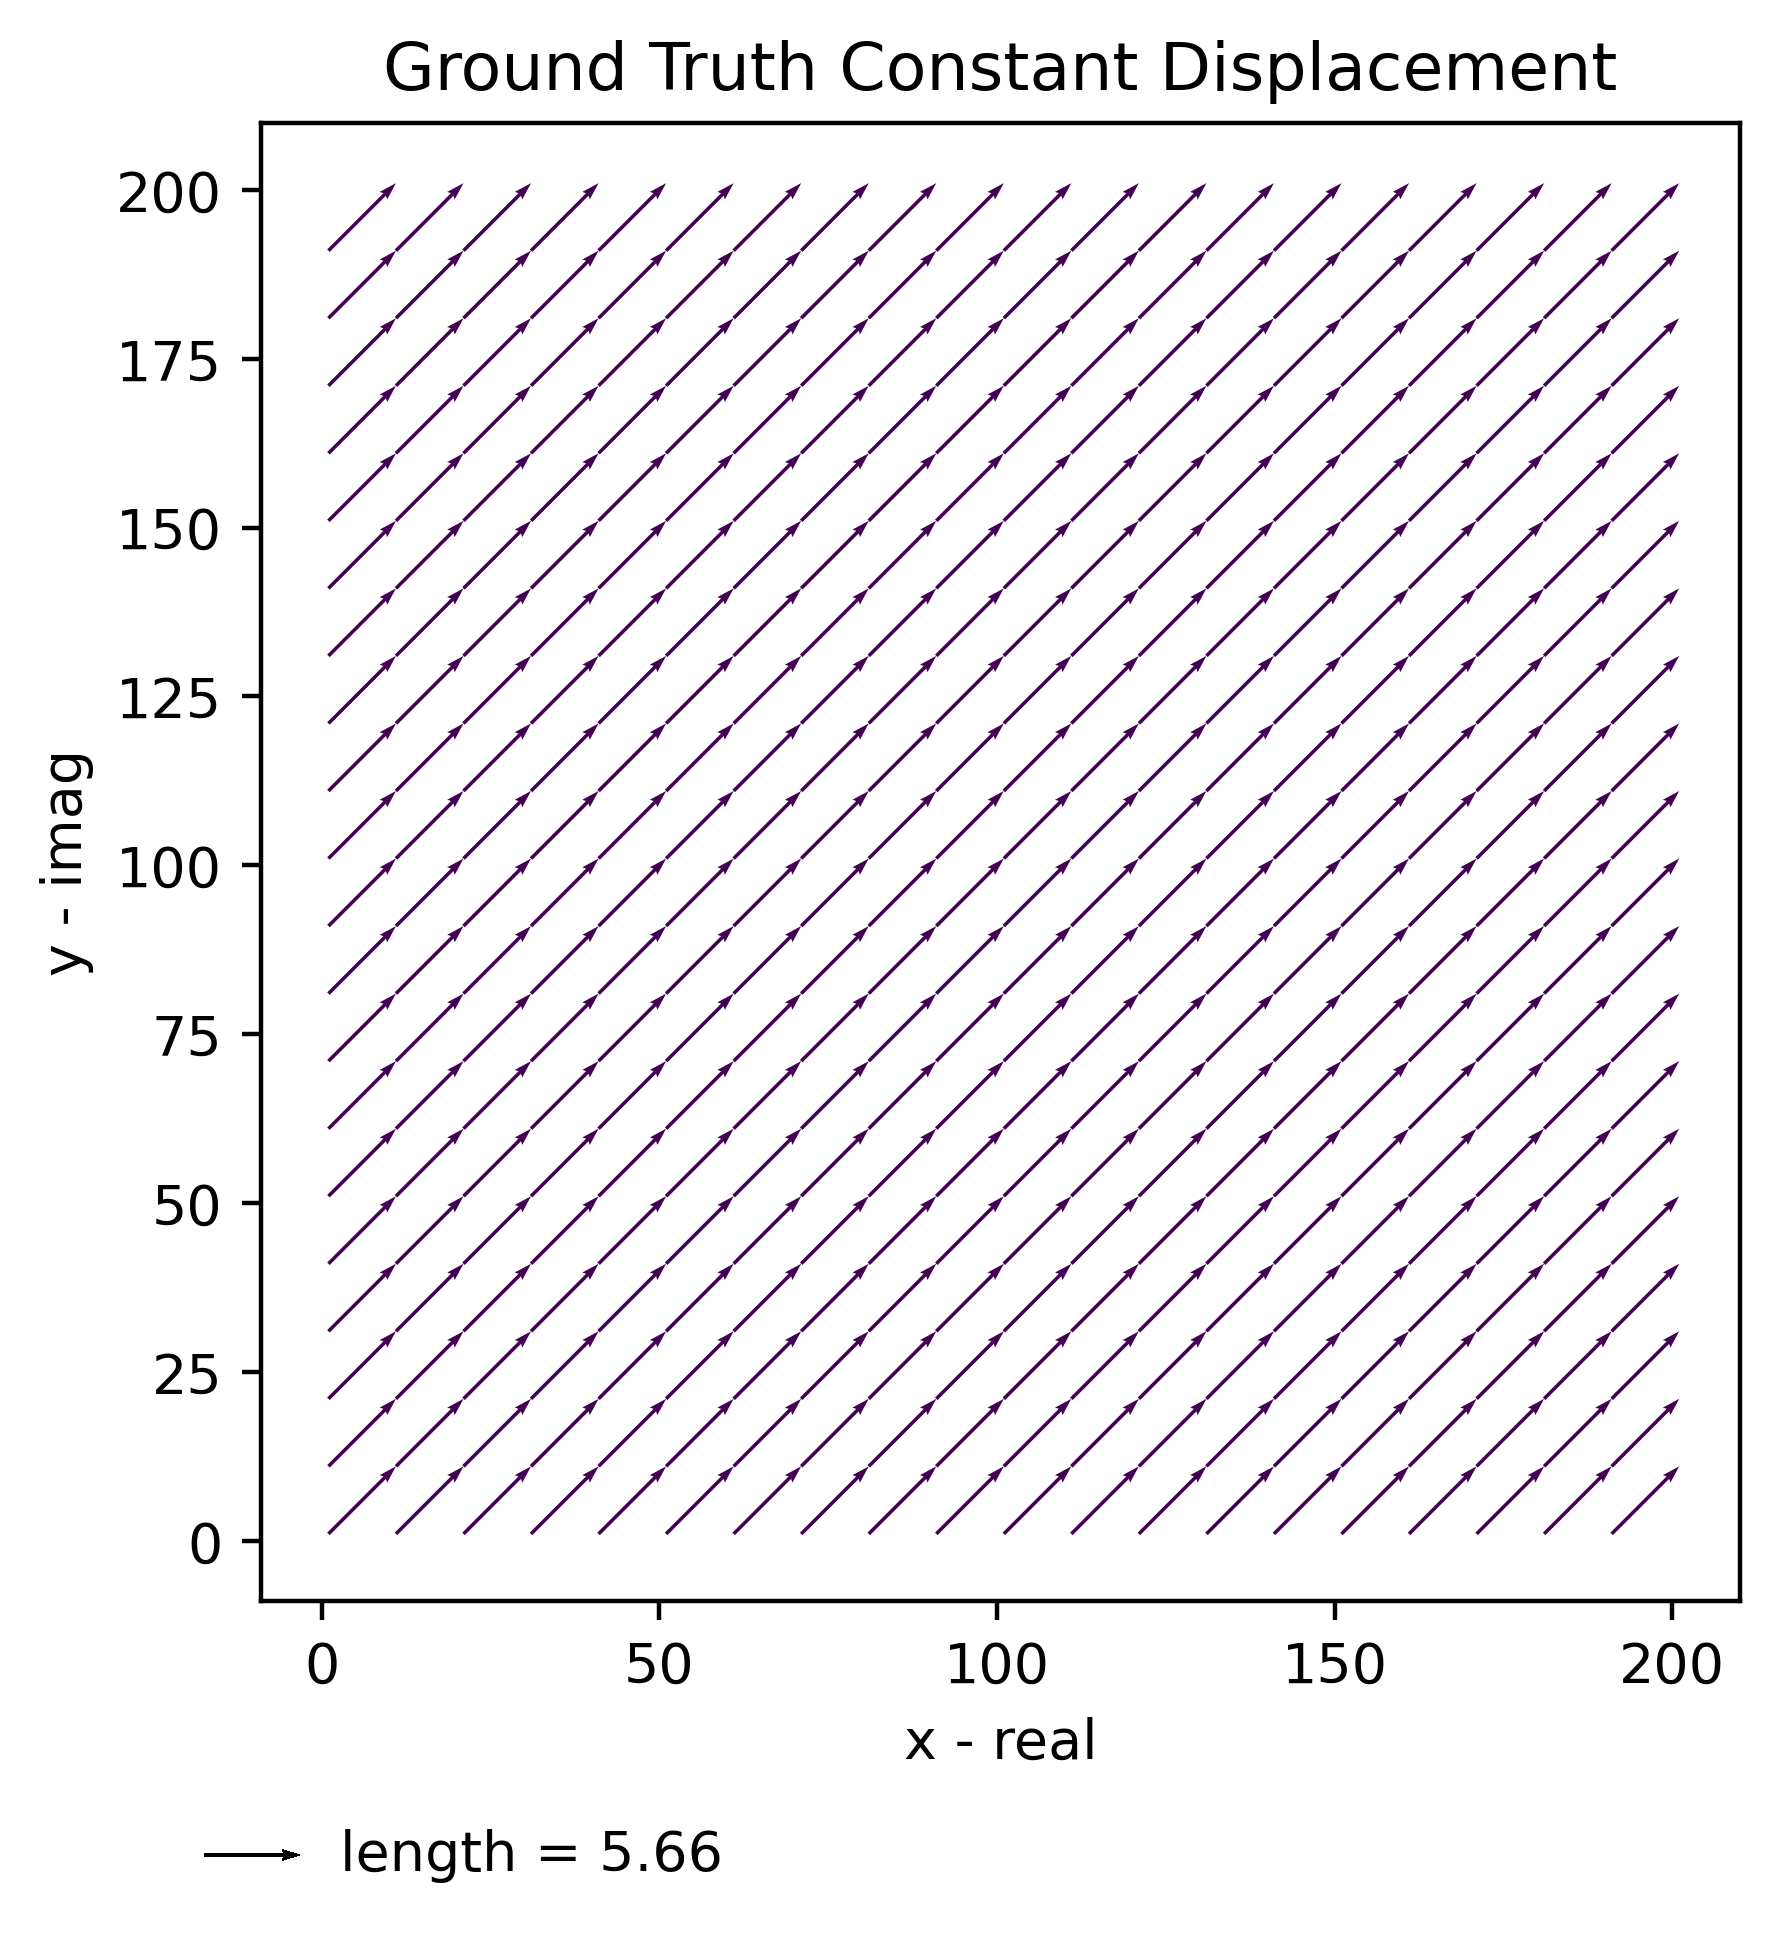

test


PyObject <matplotlib.quiver.Quiver object at 0x1c225c1d0>

In [73]:
showflow(flow, figtitle="Ground Truth Constant Displacement", ret=:pyobject)

## estimation using single LAP

In [61]:
u_est = single_lap(img, imgw, fhs, window);

# show the NaN location
nan_img = map(x -> isnan(x) ? 1 : 0, u_est);
# imgshow(nan_img, fig=figure(figsize=(3,3)), figtitle="nans here", ret=:pyobject)

## show results
the greener the closer the estimation to the real flow

In [71]:
#imgshow(img, ret=:pyobject, figtitle="Chessboard Image")

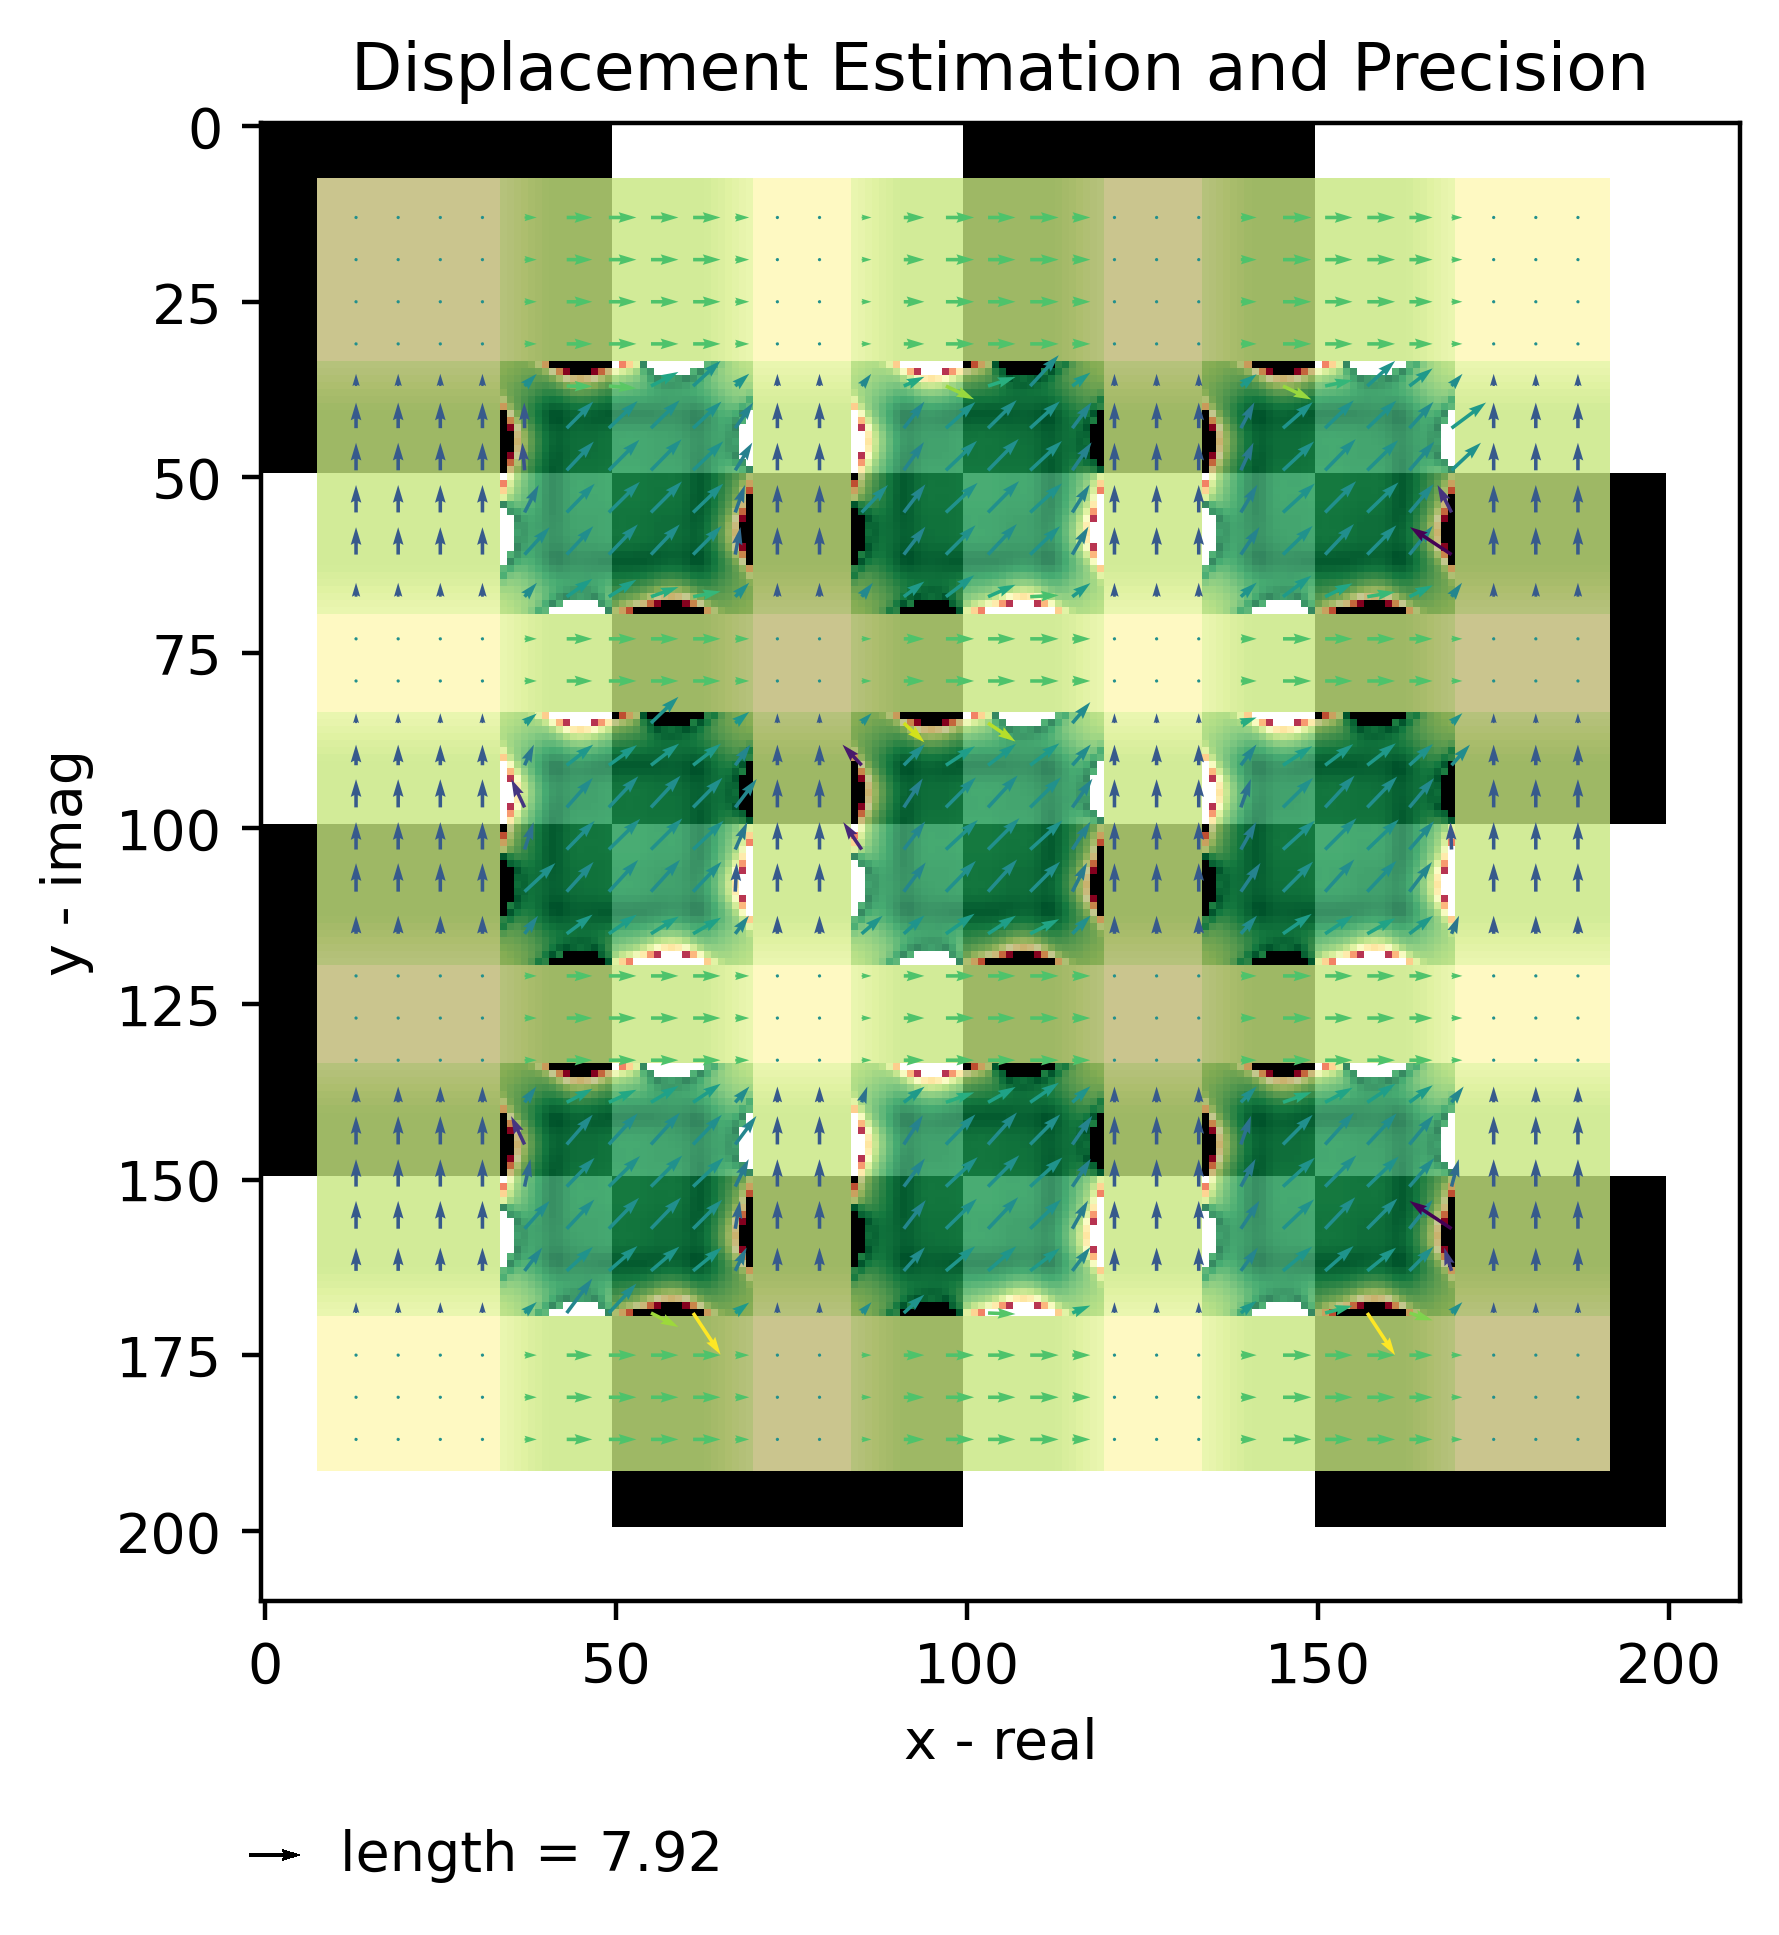

test


PyObject <matplotlib.image.AxesImage object at 0x1b8a1f610>

In [72]:
imgshowflow(img, u_est, skip_count=5, ret=:pyobject, figtitle="Displacement Estimation and Precision")
 

function error_percentage(estim, truth)
    error = abs(estim - truth)
    return error/truth
end

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(u_est, flow))
imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.8)


### Create constant flow and lena images

In [48]:
using TestImages
lena = Float32.(testimage("lena_gray"))
lena_flow = 5 .* ones(size(lena)) .+ 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))

# show image dif and shift
# imgoverlay(lena, lenaw, fig=figure(figsize=(3,3)), figtitle="lena and lenaw differences", ret=:pyobject);
# showflow(lena_flow, fig=figure(figsize=(3,3)), figtitle="constant displacement", ret=:pyobject)

lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

test


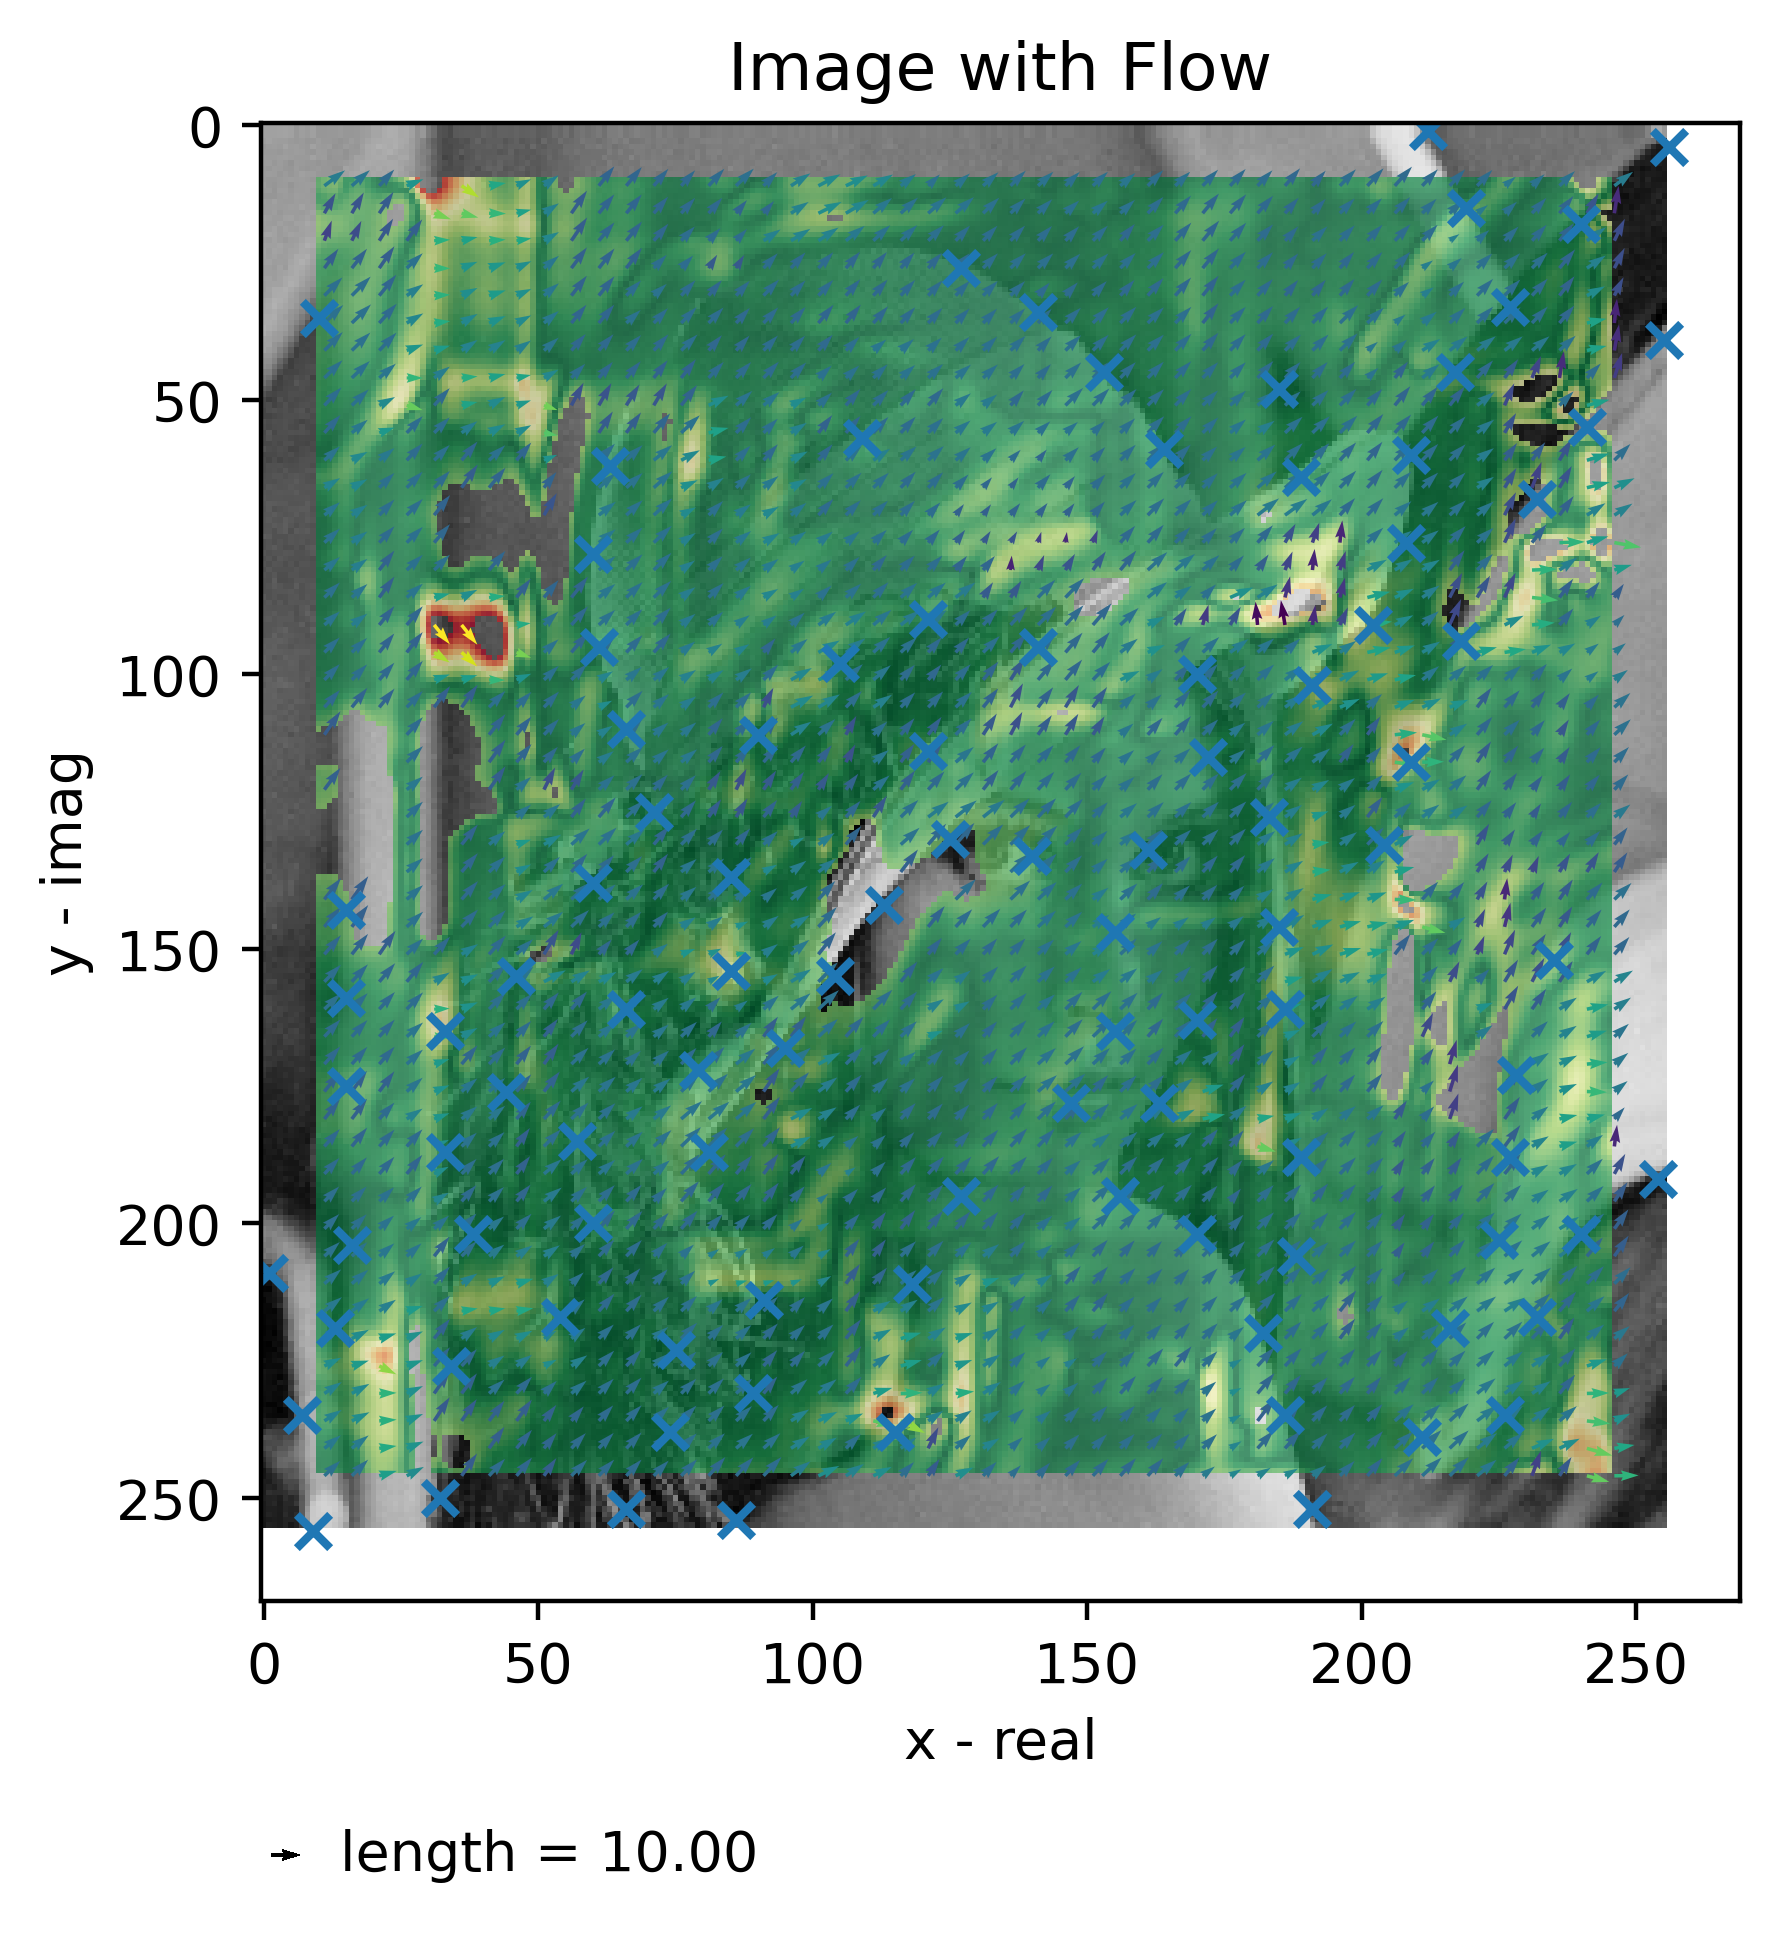

PyObject <matplotlib.collections.PathCollection object at 0x1759f9850>

In [49]:
imgshowflow(lena, lena_u_est, skip_count=4, ret=:pyobject)
 

function error_percentage(estim, truth)
    error = abs(estim - truth)
    return error/truth
end

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.7)

inds = find_edge_points(lena, spacing = 15, number=100)
pos_x = [ind[1] for ind in inds]
pos_y = [ind[2] for ind in inds]

scatter(pos_y, pos_x, marker = :x)


In [ ]:
println(mean(filter(!isnan, good_estimation)))
println(maximum(filter(!isnan, good_estimation)))
println(minimum(filter(!isnan, good_estimation)))

imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.7)

inds = find_edge_points(lena, spacing = 15, number=50)
addpoints(inds)

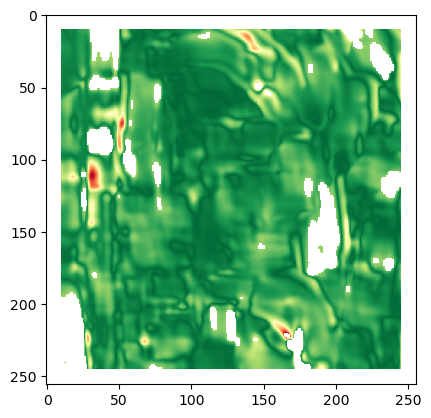

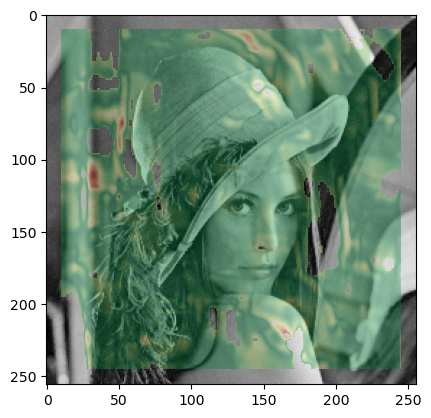

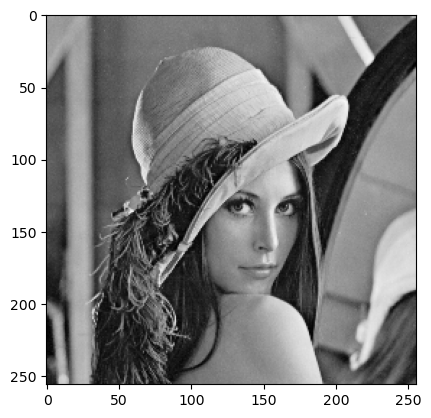

PyObject <matplotlib.image.AxesImage object at 0x1585503d0>

In [22]:
# different flow


lena_flow = 5 .* ones(size(lena)) .- 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))

lena_u_est = single_lap(lena, lenaw, 10, [21,21]);
#imgshowflow(lena, lena_u_est, skip_count=4, ret=:pyobject)
#imgshow(lena, ret=:pyobject)
#imshow(lena, cmap=:gray, alpha = 0.5)

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))
imshow(good_estimation, cmap = :RdYlGn_r, alpha = 1)

figure()
imshow(lena, cmap=:gray, alpha = 1)

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))
imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.4)

figure()
imshow(lena, cmap=:gray, alpha = 1)

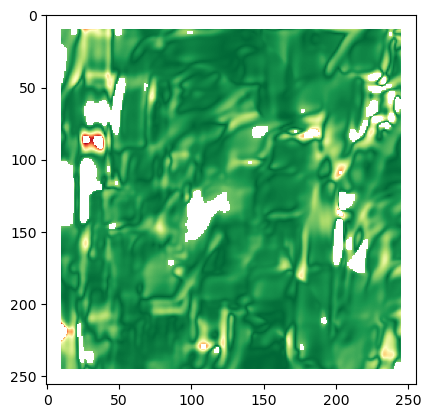

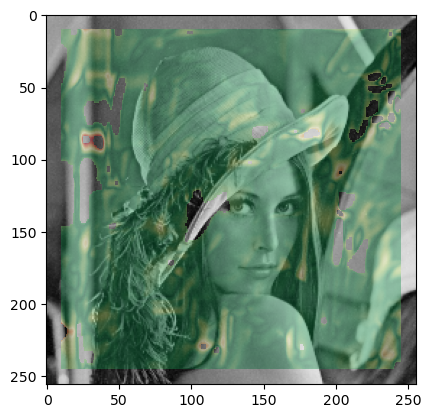

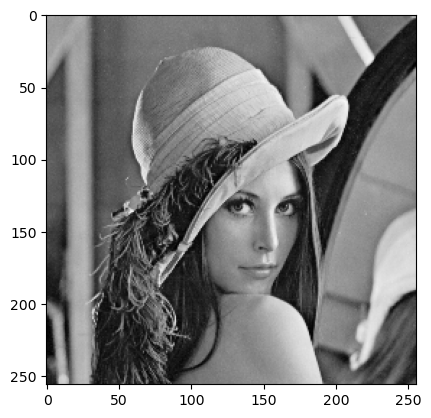

PyObject <matplotlib.image.AxesImage object at 0x15878aad0>

In [24]:
# different flow


lena_flow = -5 .* ones(size(lena)) .- 5 .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))

lena_u_est = single_lap(lena, lenaw, 10, [21,21]);
#imgshowflow(lena, lena_u_est, skip_count=4, ret=:pyobject)
#imgshow(lena, ret=:pyobject)
#imshow(lena, cmap=:gray, alpha = 0.5)

good_estimation = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

imshow(good_estimation, cmap = :RdYlGn_r, alpha = 1)

figure()
imshow(lena, cmap=:gray, alpha = 1)
imshow(good_estimation, cmap = :RdYlGn_r, alpha = 0.4)

figure()
imshow(lena, cmap=:gray, alpha = 1)

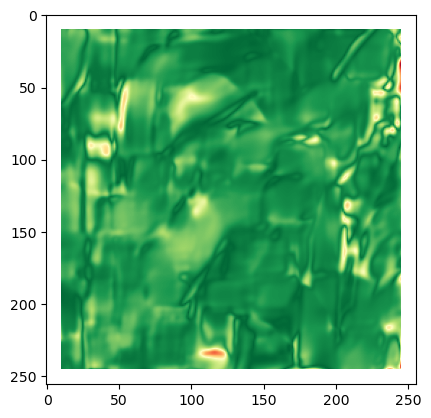

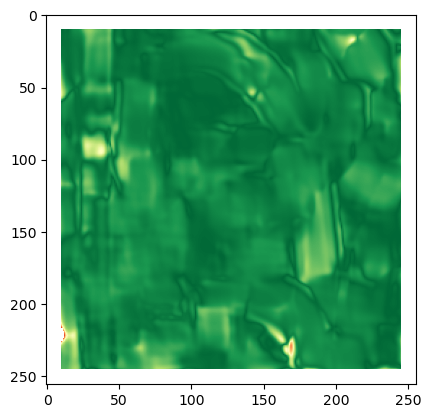

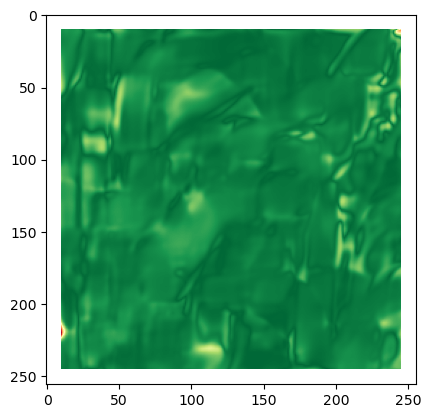

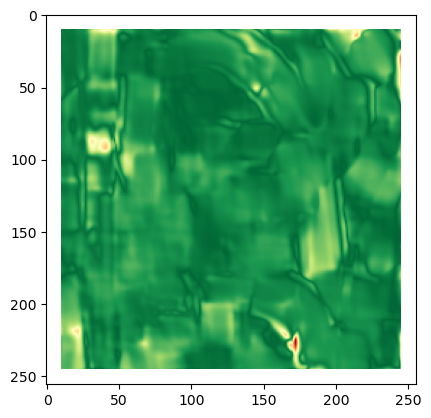

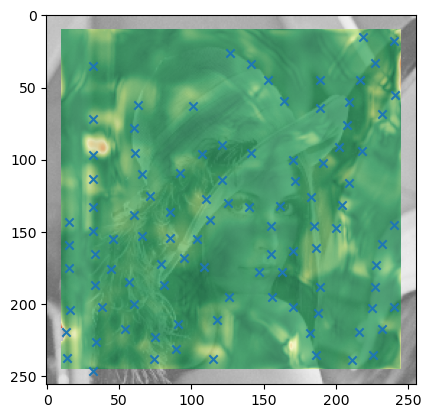

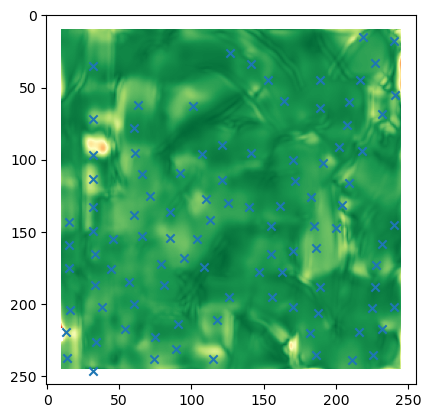

PyObject <matplotlib.collections.PathCollection object at 0x16587d810>

In [47]:
shift = 3

# 1 
lena_flow = shift .* ones(size(lena)) .+ shift .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))
lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

good_estimation_1 = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

figure()
imshow(good_estimation_1, cmap = :RdYlGn_r, alpha = 1)

# 2 
lena_flow = -shift .* ones(size(lena)) .+ shift .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))
lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

good_estimation_2 = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

figure()
imshow(good_estimation_2, cmap = :RdYlGn_r, alpha = 1)

# 3 
lena_flow = -shift .* ones(size(lena)) .- shift .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))
lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

good_estimation_3 = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

figure()
imshow(good_estimation_3, cmap = :RdYlGn_r, alpha = 1)

# 4 
lena_flow = +shift .* ones(size(lena)) .- shift .* ones(size(lena)) .* im
lenaw = warp_img(lena, -real(lena_flow), -imag(lena_flow))
lena_u_est = single_lap(lena, lenaw, 10, [21,21]);

good_estimation_4 = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(lena_u_est, lena_flow))

figure()
imshow(good_estimation_4, cmap = :RdYlGn_r, alpha = 1)


# all together
figure()
imshow(lena, cmap=:gray, alpha = 0.6)
all = map(x -> sum(x),  zip(good_estimation_1, good_estimation_2, good_estimation_3, good_estimation_4))
imshow(all, cmap = :RdYlGn_r, alpha = 0.7)
# add points
using Images
fhs = 10
mask = parent(padarray(trues(size(lena).-(2*fhs, 2*fhs)), Fill(false, (fhs, fhs), (fhs, fhs))))
inds = find_edge_points(lena, spacing = 15, number=100, mask=mask)
pos_x = [ind[1] for ind in inds]
pos_y = [ind[2] for ind in inds]

scatter(pos_y, pos_x, marker = :x)

figure()
imshow(all, cmap = :RdYlGn_r, alpha = 1)
pos_x = [ind[1] for ind in inds]
pos_y = [ind[2] for ind in inds]

scatter(pos_y, pos_x, marker = :x)

In [41]:
filter(!isnan, collect((12, 12)))

2-element Array{Int64,1}:
 12
 12

In [43]:
using Images, BenchmarkTools
viewimg(img) = colorview(Gray, img)

viewimg (generic function with 1 method)

## Second Try

In [25]:
img, imgw, flow = gen_init(:spaghetti, :uniform, flow_args=[rand(Complex{Float64}), 5]);

┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1273
┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1273


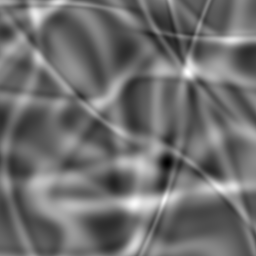

In [7]:
viewimg(img)

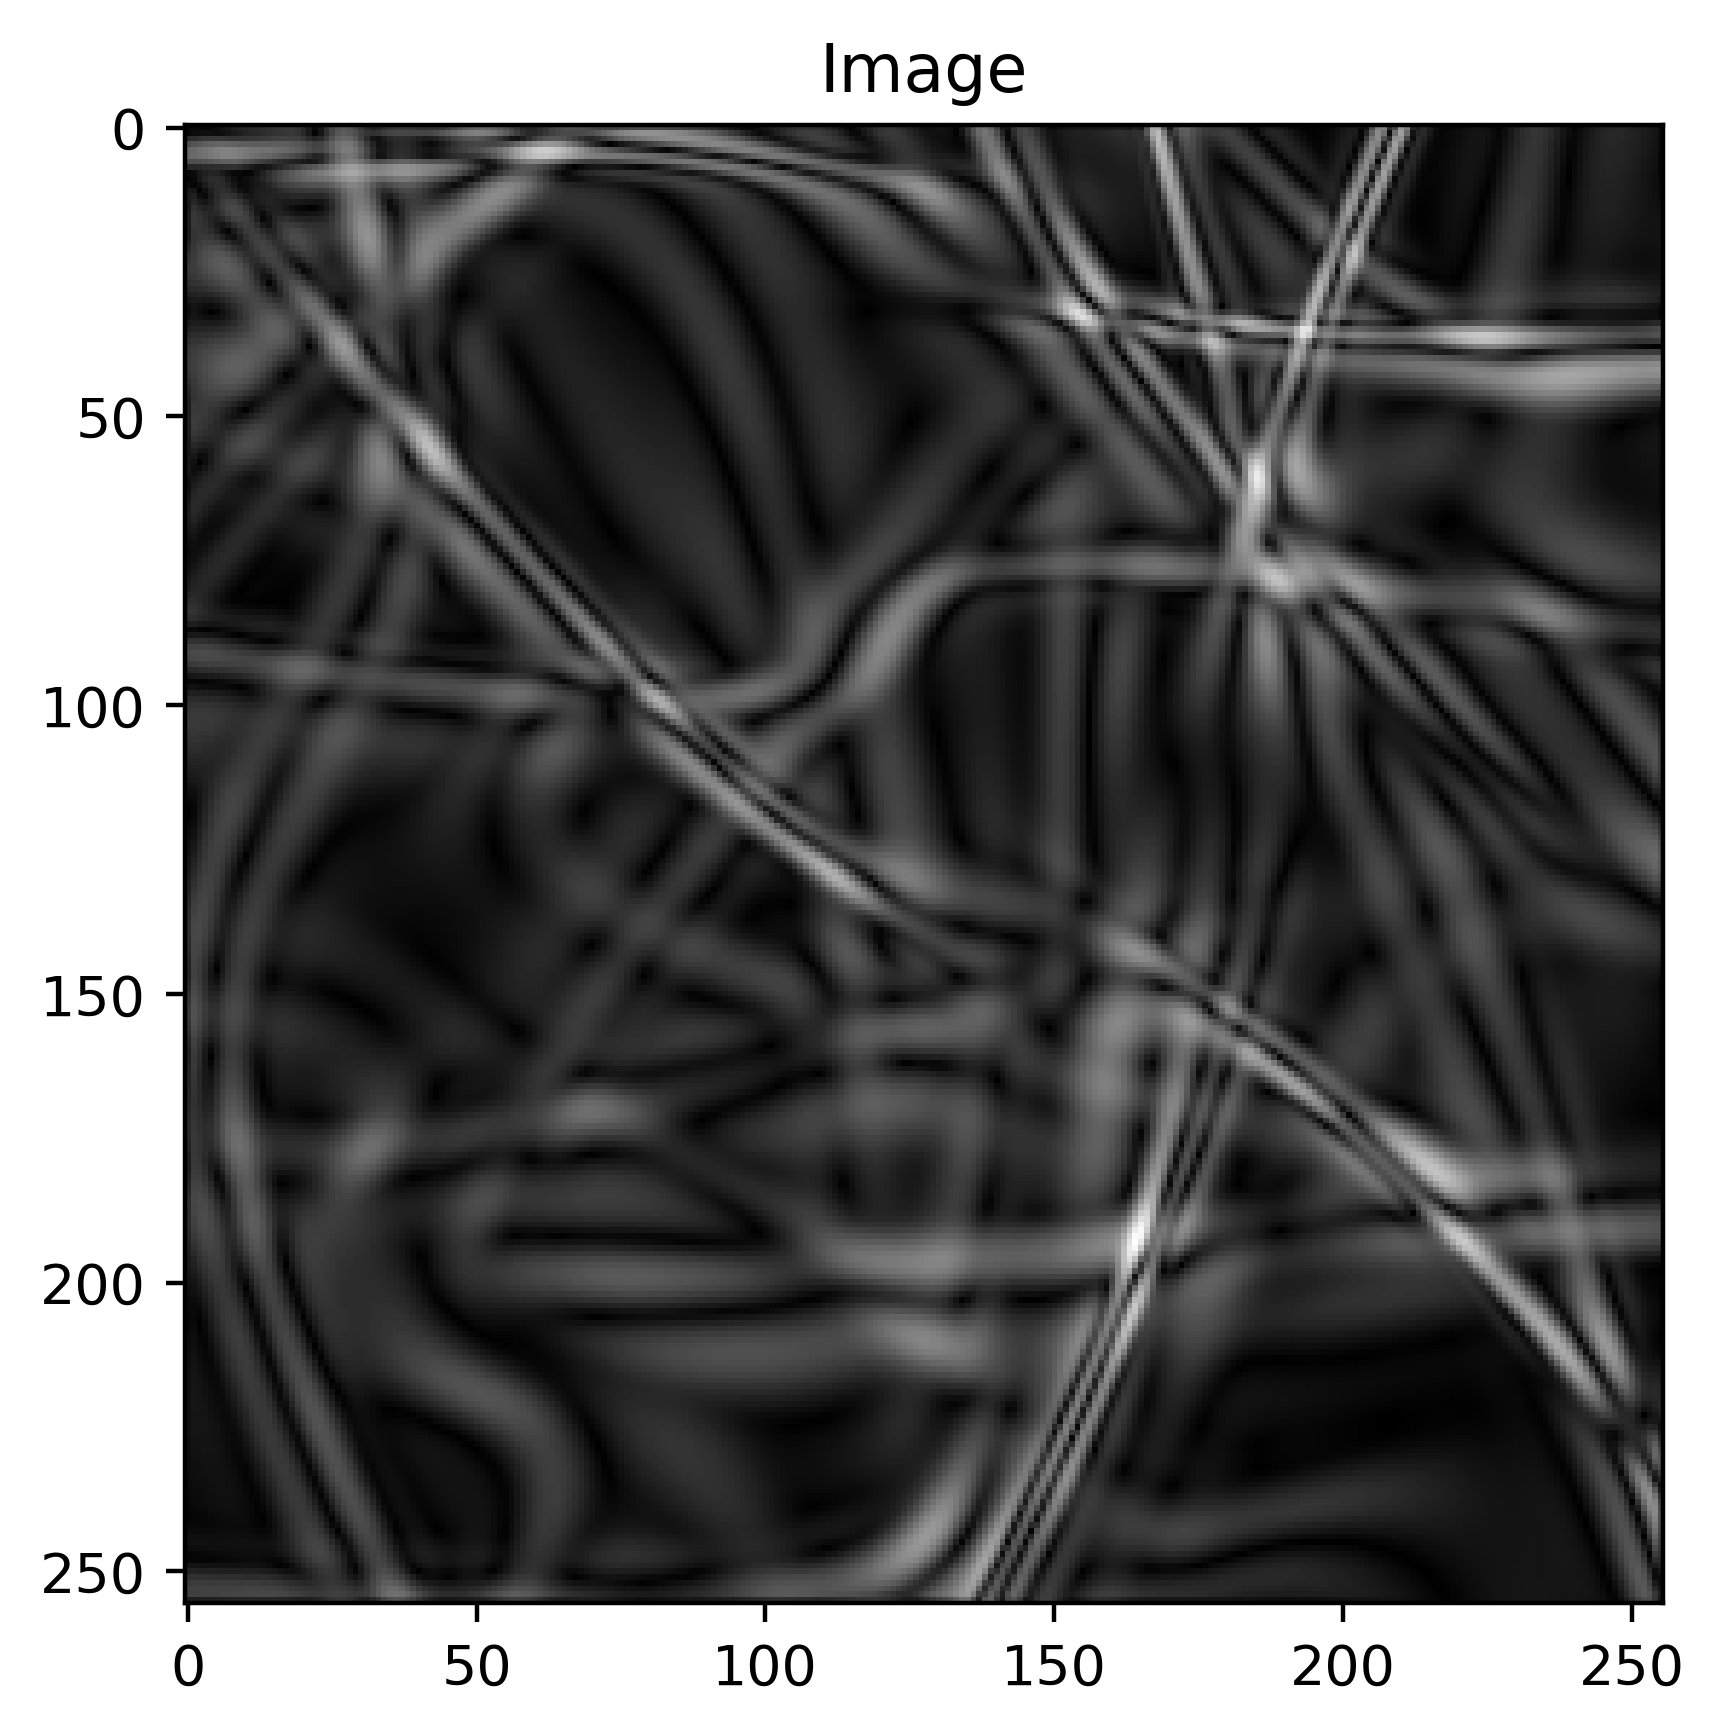

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x14b57a910>

In [23]:
grad, imge = LAP_julia.gradient_magnitude(img);
conf = Dict(:ret => :pyobject) # , :fig => subplots(dpi = 400, figsize = (2,2))
imgshow(imge; conf...)

In [26]:
flow_est = single_lap(img, imgw, 10, [21,21]);

In [ ]:
nan_img = zeros(size(img))
nan_img[isnan.(flow_est)] .= 1
imgshow(nan_img; conf...)

In [1]:
function error_percentage(estim, truth)
    error = abs(estim - truth)
    return error/abs(truth)
end

percentage_errors = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(flow_est, flow));

UndefVarError: UndefVarError: flow_est not defined

In [104]:

ncc(imge[.!isnan.(flow_est)], percentage_errors[.!isnan.(flow_est)])

0.11653008426074656

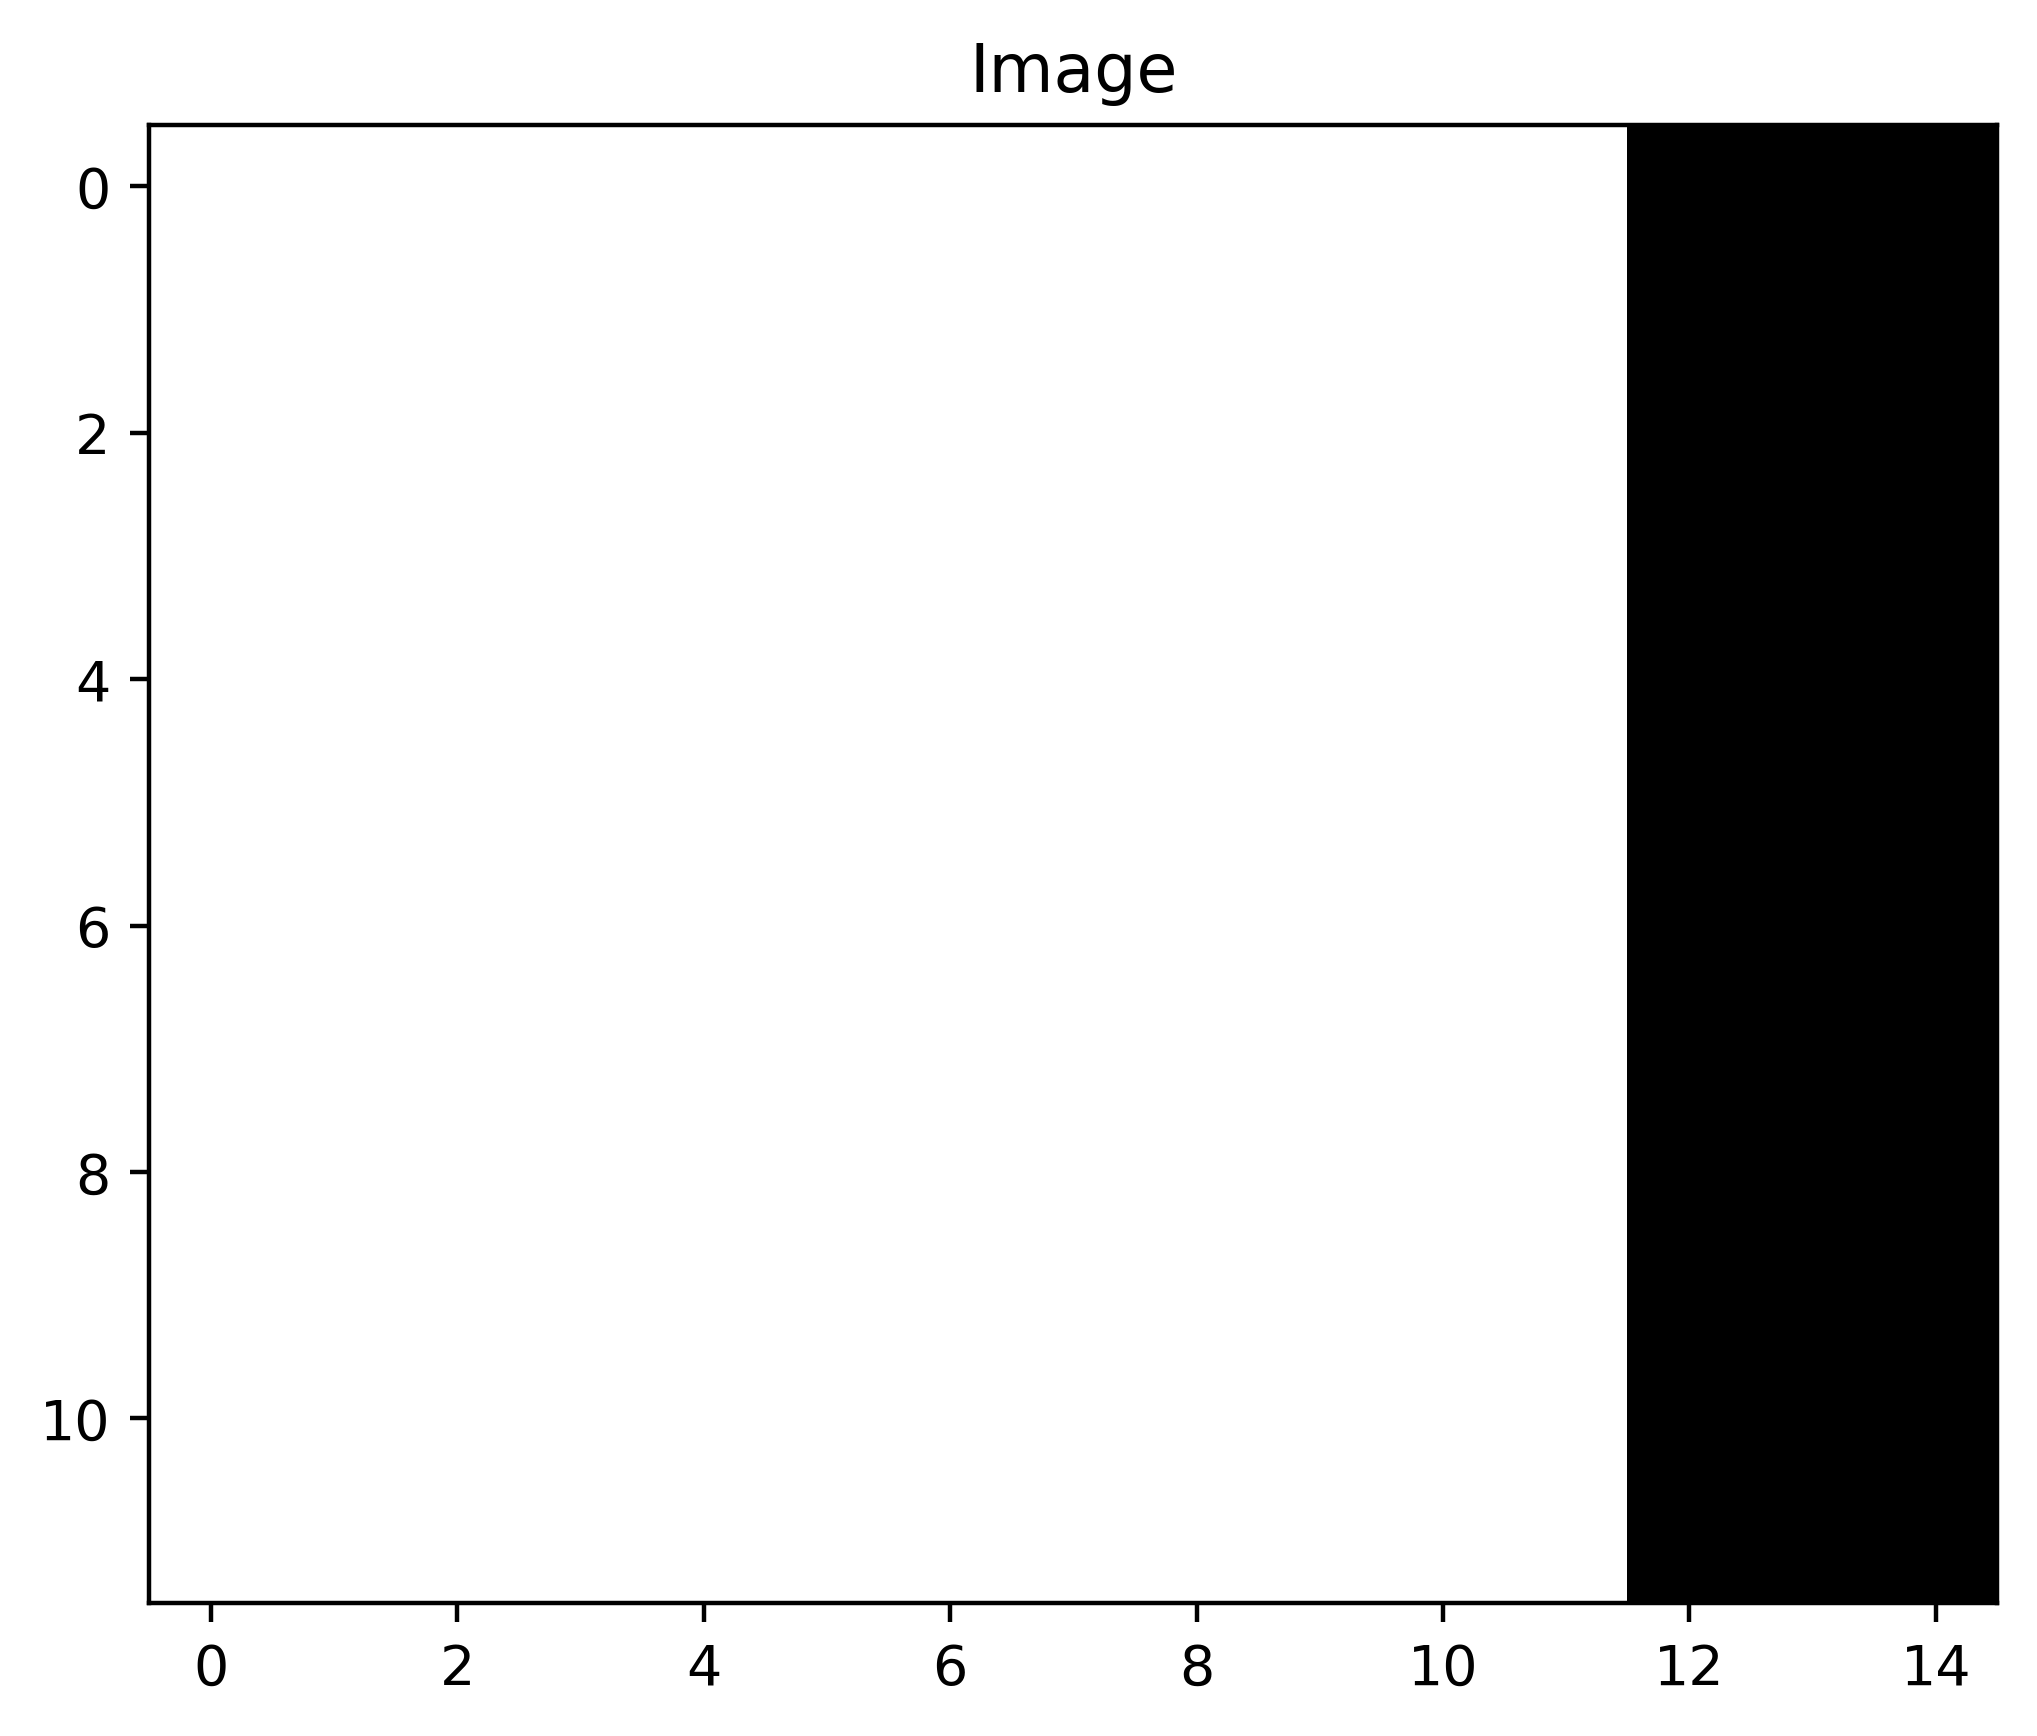

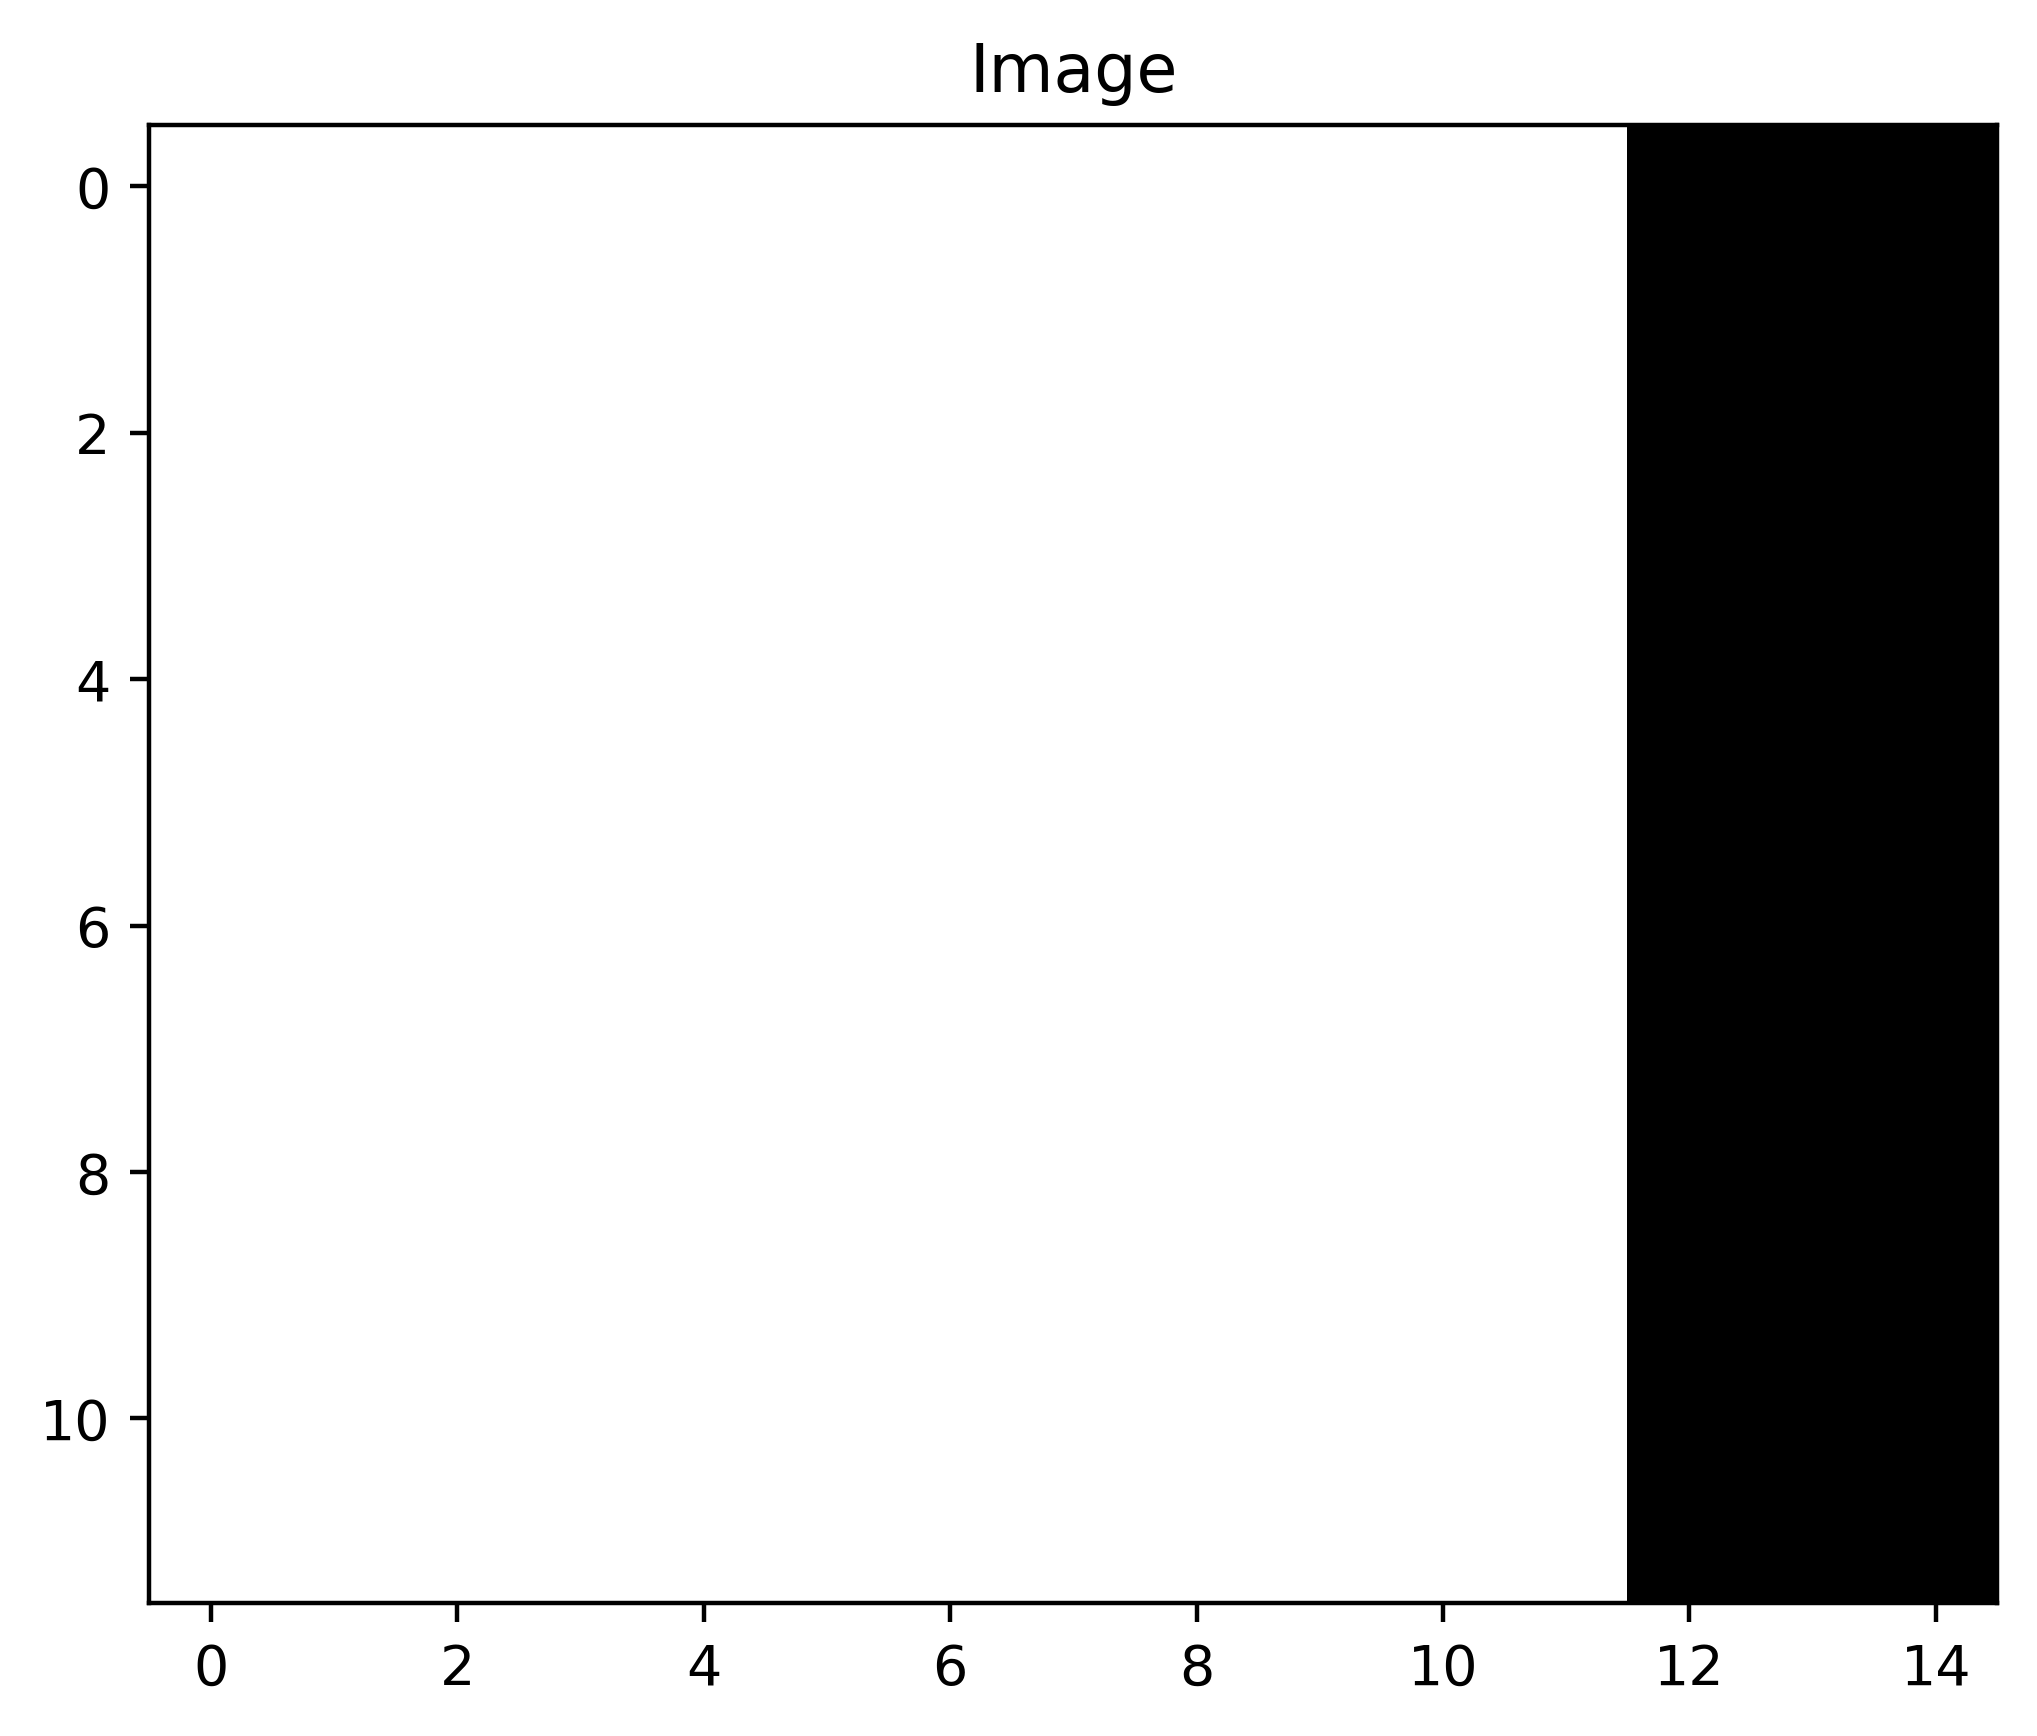

In [103]:
imgshow([ones(12,12) zeros(12,3)])

In [109]:
# ncc of percentage error and edge image
nccs=zeros(100)

for k in 1:100
    img, imgw, flow = gen_init(:lena, :uniform, flow_args=[rand(Complex{Float64}), 5]);
    grad, imge = LAP_julia.gradient_magnitude(img);
    flow_est = single_lap(img, imgw, 10, [21,21]);
    percentage_errors = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(flow_est, flow));
    nccs[k] = ncc(imge[.!isnan.(flow_est)], percentage_errors[.!isnan.(flow_est)])
end


In [110]:
mean(nccs)

0.08153990050299492

In [86]:
median(nccs)

0.09059455927760121

In [87]:
maximum(nccs)

0.20925922421407936

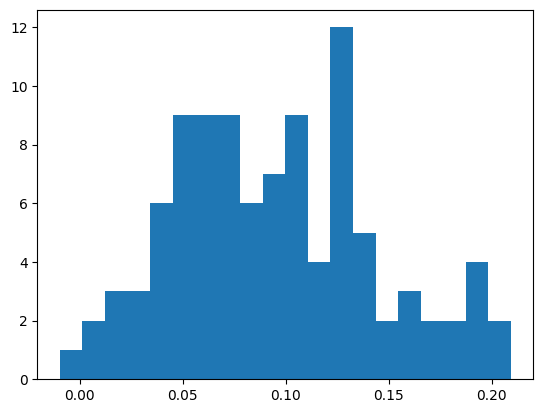

In [88]:
h = plt.hist(nccs, 20);

In [190]:
# ncc of percentage error and edge image top 150 edges
nccs=zeros(100)

for k in 1:100
    img, imgw, flow = gen_init(:spaghetti, :uniform, flow_args=[rand(Complex{Float64}), 5]);
    grad, imge = LAP_julia.gradient_magnitude(img);
    flow_est = single_lap(img, imgw, 10, [21,21]);
    percentage_errors = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(flow_est, flow));
    non_nan = .!isnan.(flow_est)
    imge_filt, percent_err_filt = imge[non_nan], percentage_errors[non_nan]

    p = sortperm(imge[non_nan])[1:500]
    top = CartesianIndices(imge_filt)[p]
    nccs[k] = ncc(imge_filt[top], percent_err_filt[top])
end

In [191]:
mean(nccs)

0.0058524998312427376

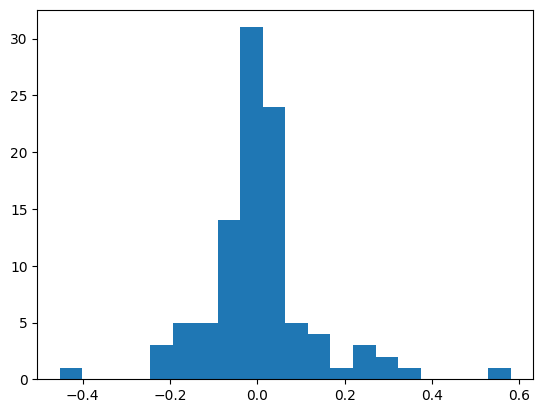

In [192]:
h = plt.hist(nccs, 20);

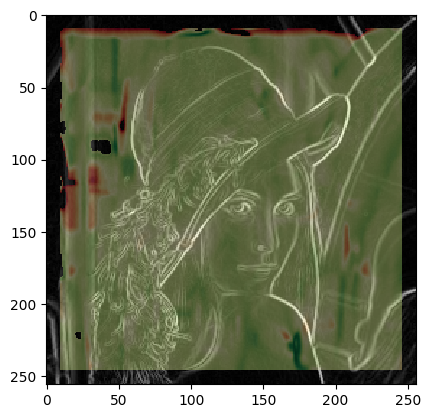

PyObject <matplotlib.image.AxesImage object at 0x16b9a0750>

In [148]:
imshow(imge, cmap=:gray, alpha = 1)
imshow(percentage_errors, cmap = :RdYlGn_r, alpha = 0.4)

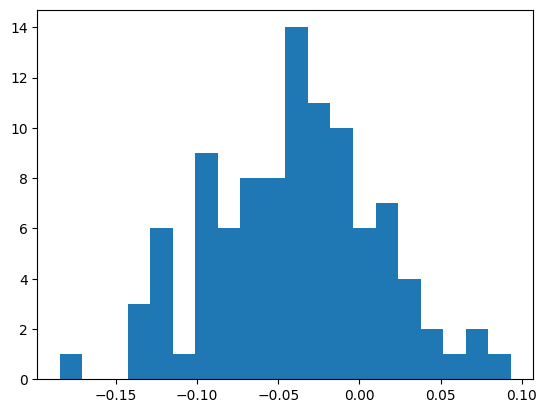

In [82]:
h = plt.hist(nccs, 20);

In [72]:
img, imgw, flow = gen_init(:spaghetti, :uniform, flow_args=[rand(Complex{Float64}), 5]);
grad, imge = LAP_julia.gradient_magnitude(img);
percentage_errors = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(flow_est, flow));
non_nan = .!isnan.(flow_est)
imge_filt, percent_err_filt = imge[non_nan], percentage_errors[non_nan];

p = sortperm(imge[non_nan]);
#top = CartesianIndices(imge)[p][1:150];

#imgshow(imge, origin_bot = true; conf...); addpoints(top; conf...)

55356-element Array{Int64,1}:
   168
   333
    15
   775
   540
   774
  1010
  1009
   541
  1244
    14
  1245
  1478
     ⋮
 40878
 40879
 40407
 28628
 40643
 27920
 28863
 28627
 27685
 27921
 28392
 28156

In [65]:
#imgshowflow(imge, flow_est; conf...)

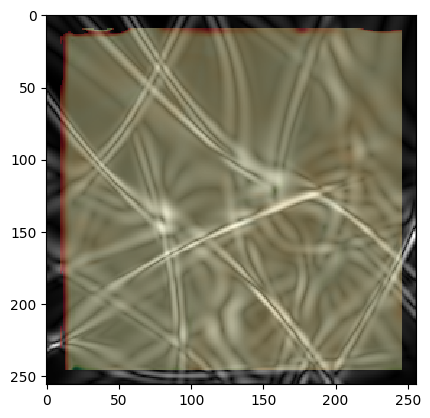

PyObject <matplotlib.image.AxesImage object at 0x15c80b4d0>

In [74]:
figure()
imshow(imge, cmap=:gray, alpha = 1)
imshow(percentage_errors, cmap = :RdYlGn_r, alpha = 0.4)

In [197]:
# ncc of percentage error and edge image
nccs=zeros(100)

for k in 1:100
    img, imgw, flow = gen_init(:lena, :uniform, flow_args=[rand(Complex{Float64}), 5]);
    grad, imge = LAP_julia.gradient_magnitude(LAP_julia.smooth_with_gaussian!(deepcopy(img), 1));
    
    flow_est = single_lap(img, imgw, 10, [21,21]);
    percentage_errors = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(flow_est, flow));
    nccs[k] = ncc(imge[.!isnan.(flow_est)], percentage_errors[.!isnan.(flow_est)])
end

In [ ]:
mean(nccs)

In [122]:
# ncc of percentage error and edge image
nccs=zeros(100)

for k in 1:100
    img, imgw, flow = gen_init(:lena, :uniform, flow_args=[rand(Complex{Float64}), 5]);
    grad, imge = LAP_julia.gradient_magnitude(LAP_julia.smooth_with_gaussian!(deepcopy(img), 10));
    
    flow_est = single_lap(img, imgw, 10, [21,21]);
    percentage_errors = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(flow_est, flow));
    nccs[k] = ncc(imge[.!isnan.(flow_est)], percentage_errors[.!isnan.(flow_est)])
end

In [123]:
mean(nccs)

-0.031417240584636415

In [124]:
grad, imge = LAP_julia.gradient_magnitude(LAP_julia.smooth_with_gaussian!(deepcopy(img), 10));

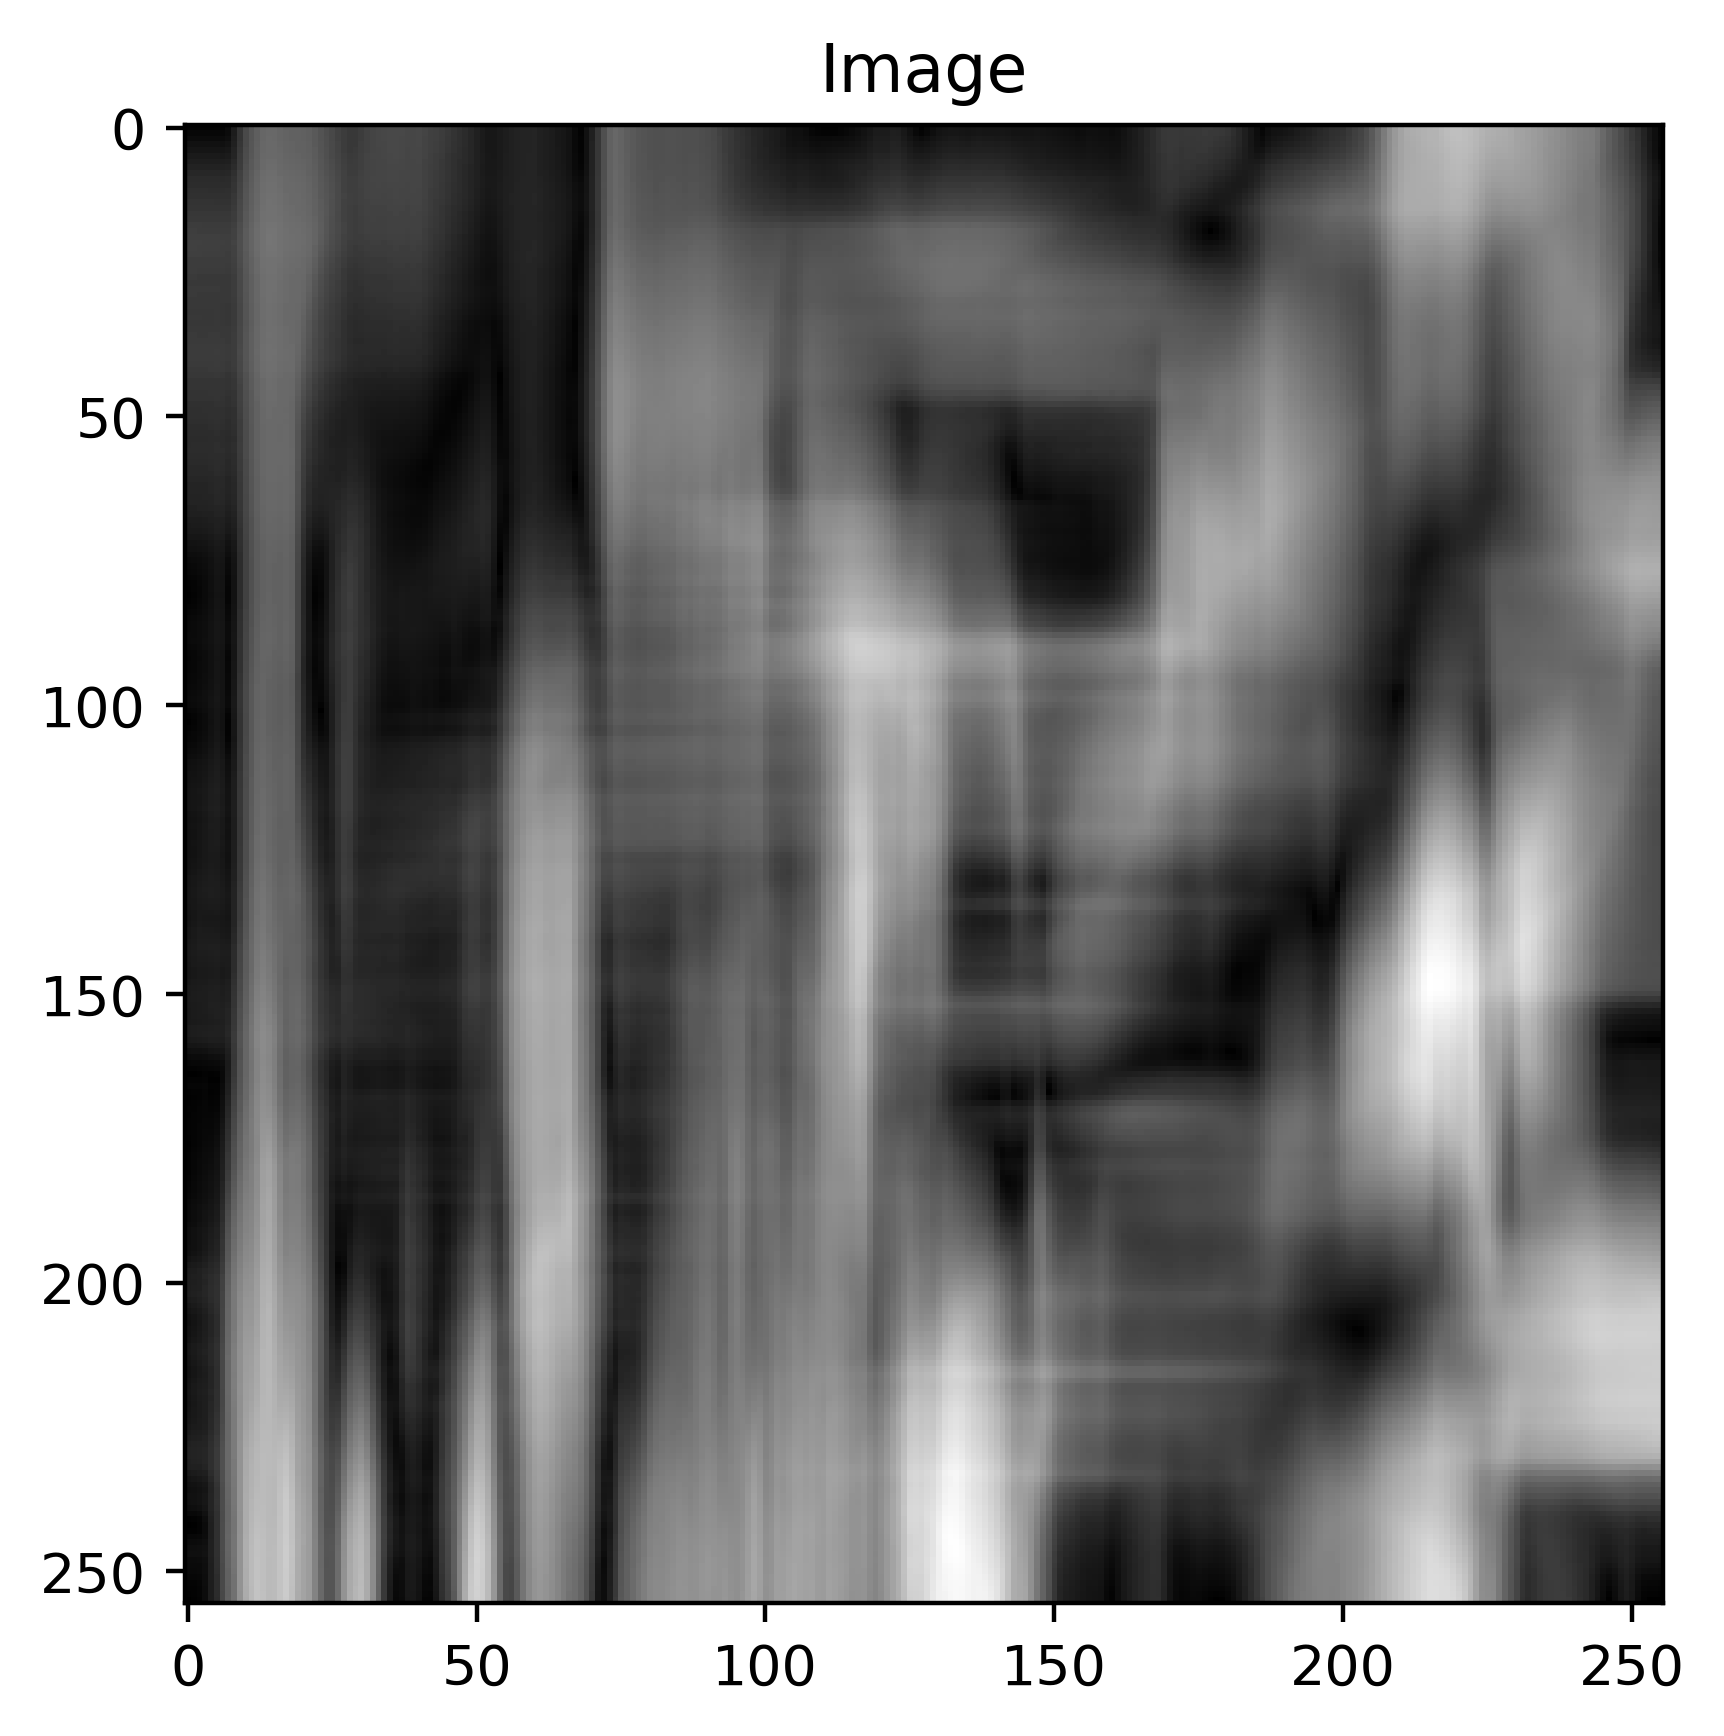

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x14af47750>

In [125]:
imgshow(imge; conf...)

In [193]:
using ImageFiltering

In [195]:
# ncc of percentage error and edge image top 150 edges 
nccs=zeros(100)
sigma = 1

for k in 1:100
    img, imgw, flow = gen_init(:spaghetti, :uniform, flow_args=[rand(Complex{Float64}), 5]);
    grad, imge = LAP_julia.gradient_magnitude(ImageFiltering.imfilter(img, ImageFiltering.Kernel.gaussian(sigma)));
    flow_est = single_lap(img, imgw, 10, [21,21]);
    percentage_errors = map(x -> LAP_julia.vec_len(error_percentage(x...)), zip(flow_est, flow));
    non_nan = .!isnan.(flow_est)
    imge_filt, percent_err_filt = imge[non_nan], percentage_errors[non_nan]

    p = sortperm(imge[non_nan])[1:500]
    top = CartesianIndices(imge_filt)[p]
    nccs[k] = ncc(imge_filt[top], percent_err_filt[top])
end

In [196]:
mean(nccs)

0.006215143739098595